In [44]:
library(readxl)
library(factoextra)
library(tidyverse)
library(dplyr)
library(corrplot)
library(clusterSim)

data <- read.csv("tooth-data.csv")

In [45]:
data <- data[-c(1, 2, 273),] # remove first 2 rows which contain desciptive information and missing row

names <- data[, 1]

modded_data <- data %>% dplyr::select(-1, -6, -7) # remove columns with string values

modded_data[, c(1:4)] <- sapply(modded_data[, c(1:4)], as.numeric) # change type to numeric

modded_data <- modded_data[complete.cases(modded_data), ] # remove missing fields

Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”
Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”


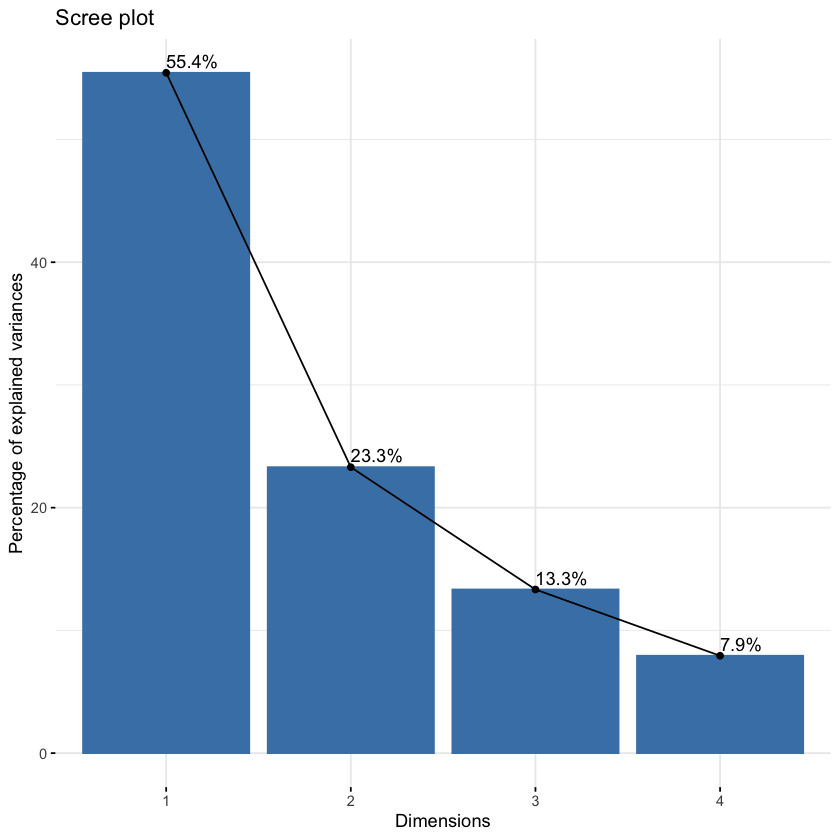

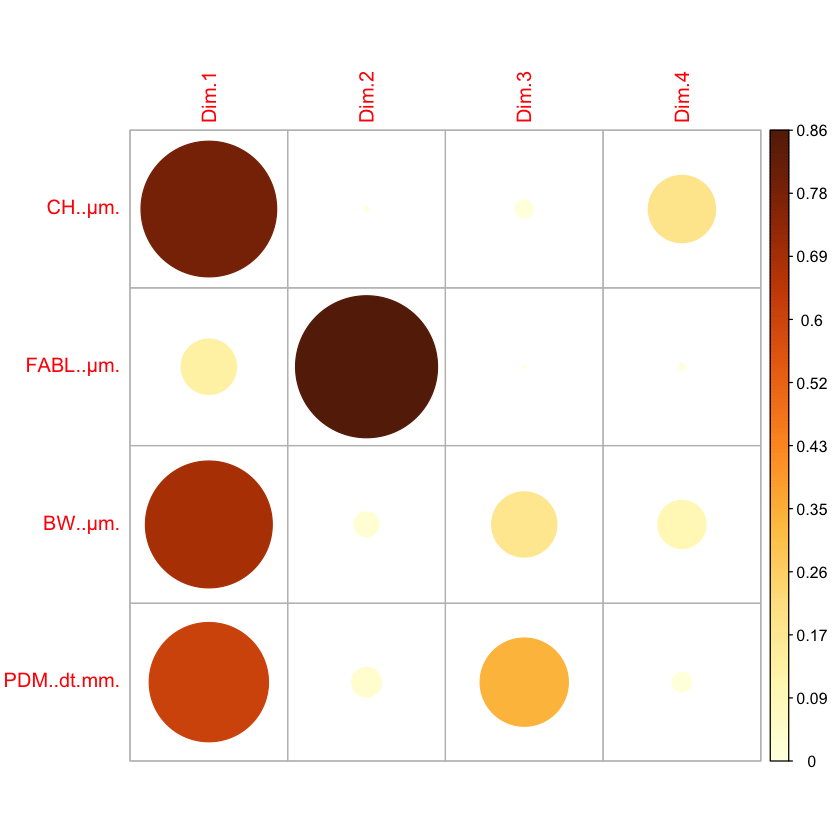

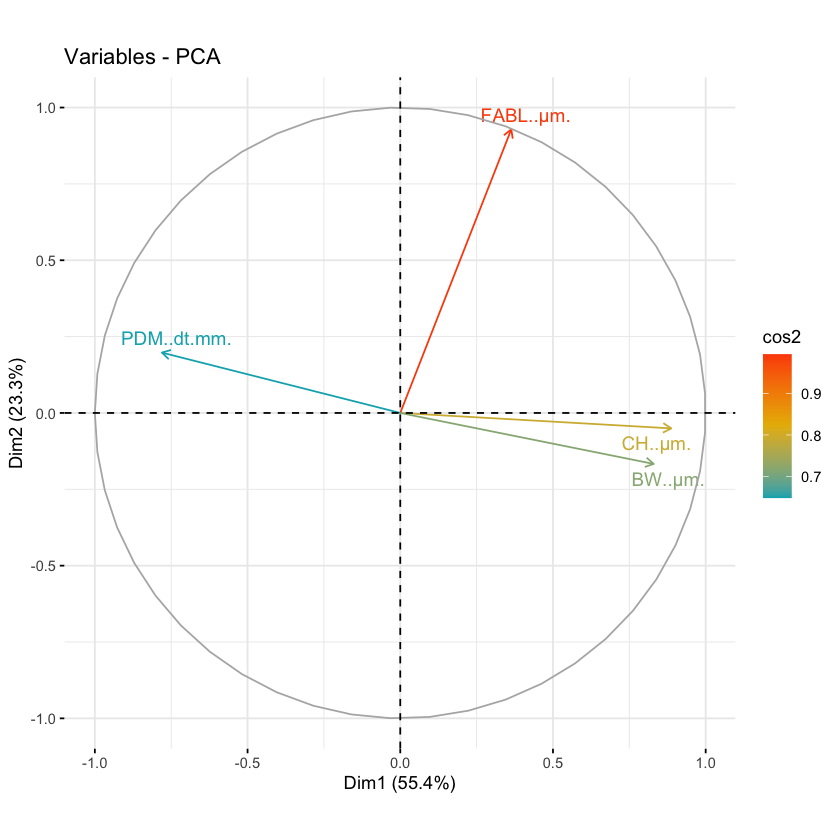

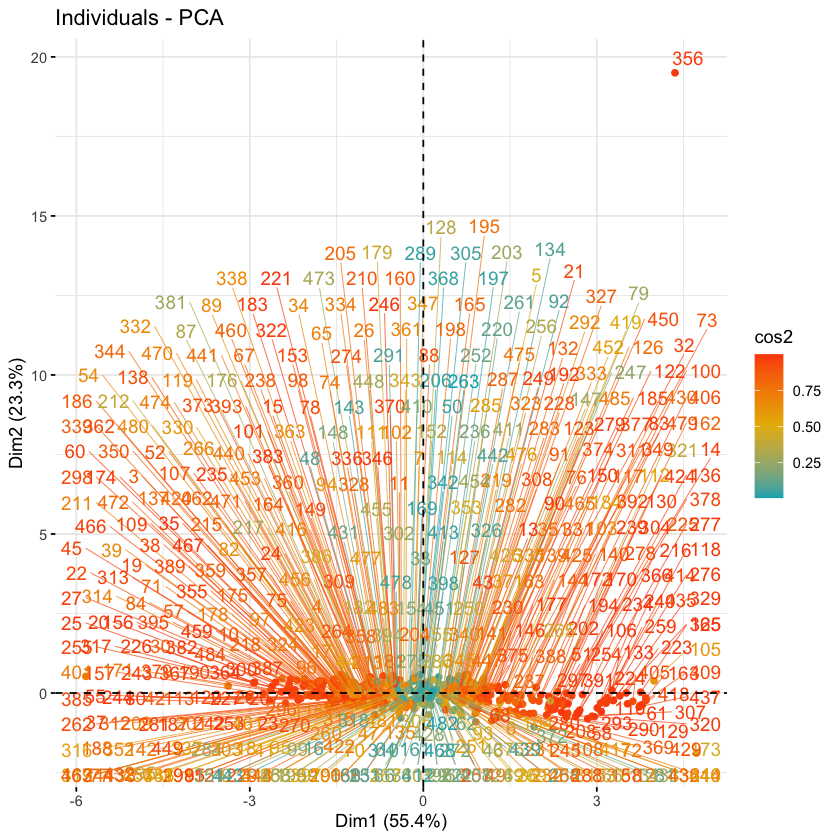

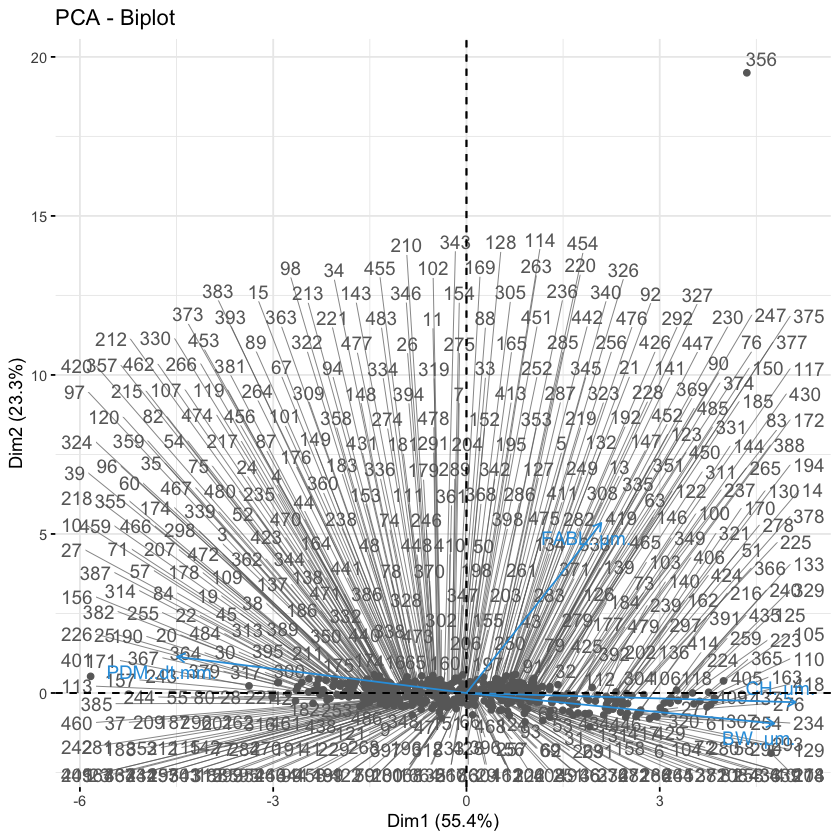

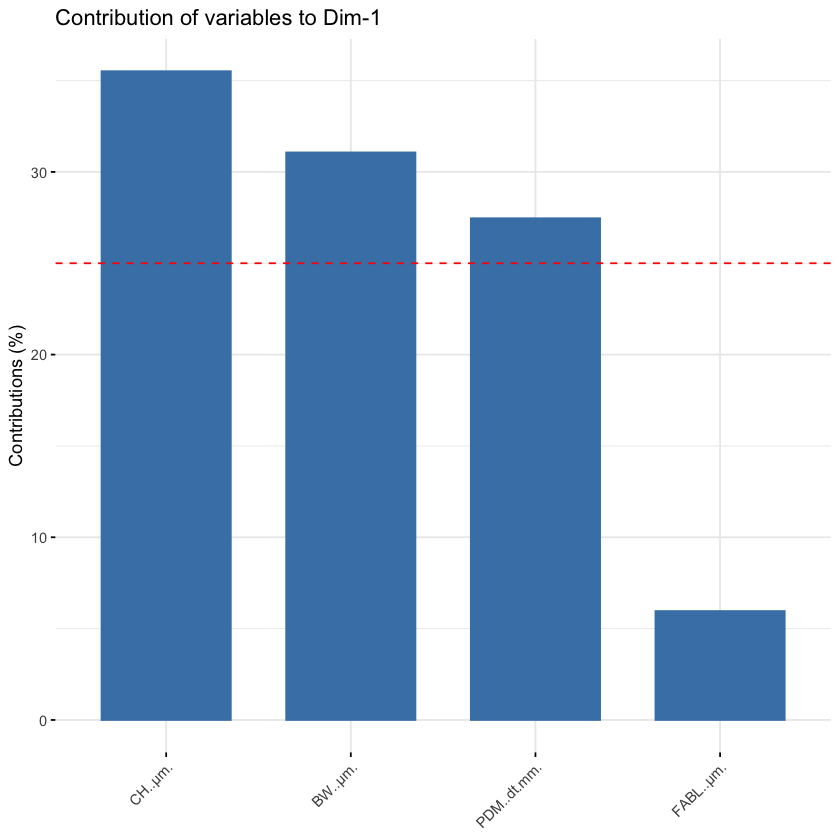

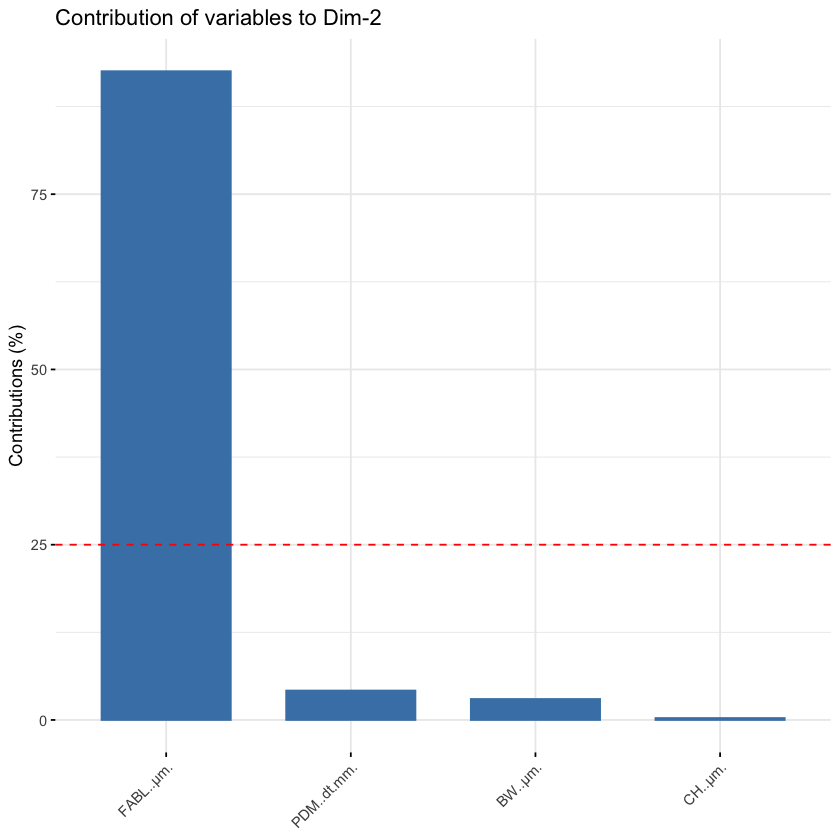

In [46]:
# options(ggrepel.max.overlaps = Inf)

pca <- prcomp(modded_data, scale = TRUE)
var <- get_pca_var(pca)


fviz_eig(pca, addlabels = TRUE)
corrplot(var$cos2, is.corr = FALSE)

fviz_pca_var(pca, col.var = "cos2",
             gradient.cols = c("#00AFBB", "#E7B800", "#FC4E07"),
             repel = TRUE, # Avoid text overlapping
             )

fviz_pca_ind(pca,
             col.ind = "cos2", # Color by the quality of representation cos2
             gradient.cols = c("#00AFBB", "#E7B800", "#FC4E07"),
             repel = TRUE     # Avoid text overlapping
             )

fviz_pca_biplot(pca, repel = TRUE,
                col.var = "#2E9FDF", # Variables color
                col.ind = "#696969"  # Individuals color
                )

fviz_contrib(pca, choice = "var", axes = 1, top = 10)
fviz_contrib(pca, choice = "var", axes = 2, top = 10)

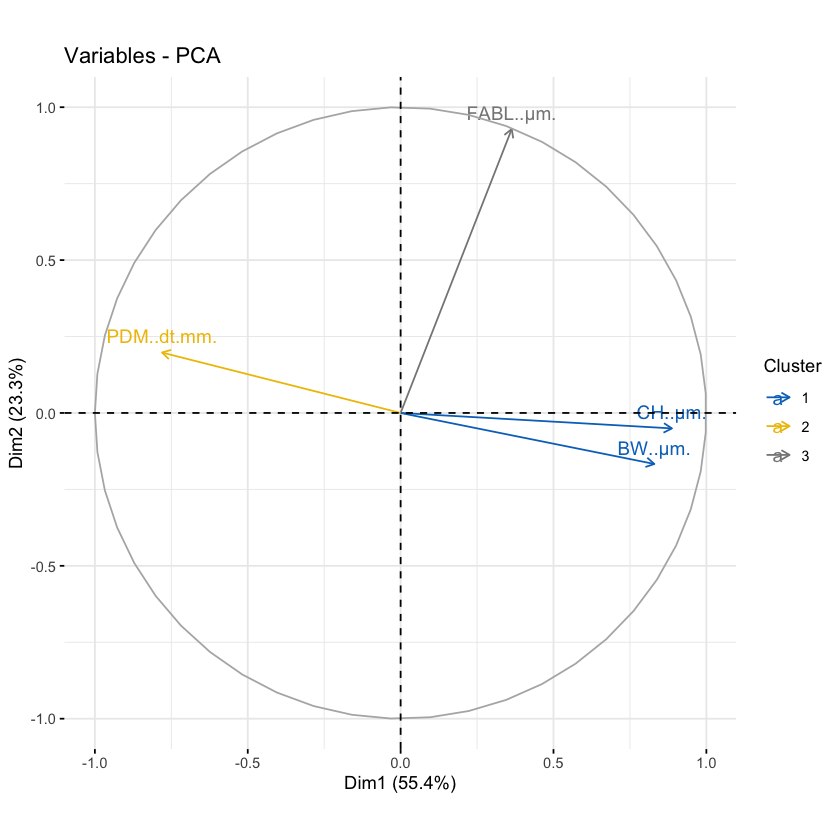

  cluster size ave.sil.width
1       1  194          0.39
2       2  266          0.53


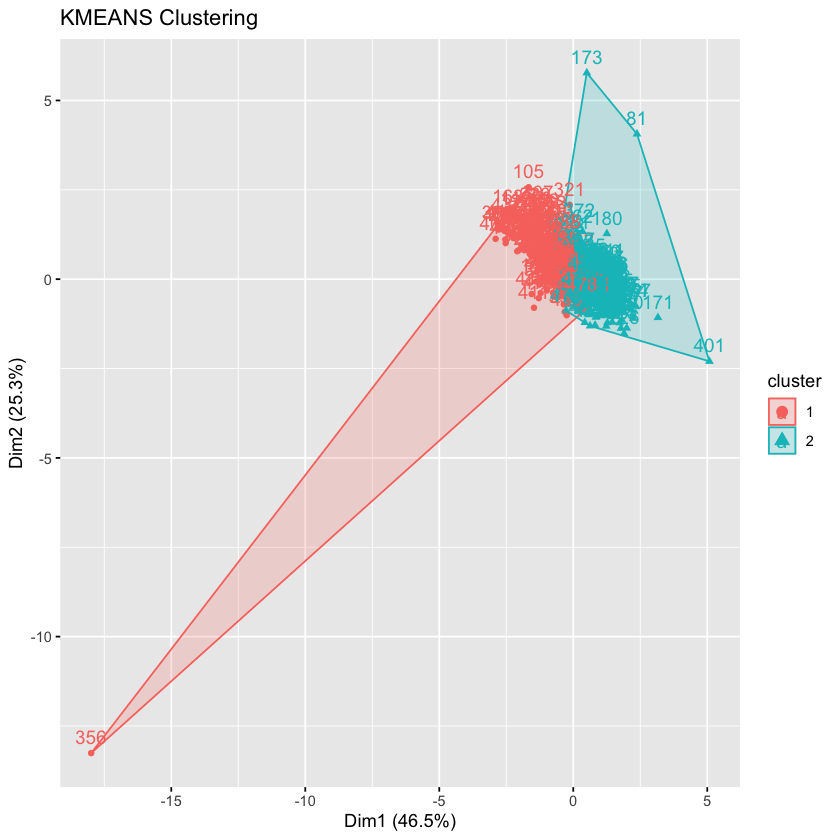

[1] 2

K-means clustering with 2 clusters of sizes 194, 266

Cluster means:
        PC1        PC2       PC3        PC4
1 -5135.169 -195.68792  37.77527 -0.6683553
2 -3830.541   19.06668 -45.42662  0.8018177

Clustering vector:
  3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18  19  20  21  22 
  2   2   1   2   2   2   2   2   2   1   1   1   2   2   2   2   2   2   1   2 
 23  24  25  26  27  28  29  30  31  32  33  34  35  36  37  38  39  40  41  42 
  2   2   2   2   2   2   2   2   2   1   2   2   2   2   2   2   2   1   2   2 
 43  44  45  46  47  48  49  50  51  52  53  54  55  56  57  58  59  60  61  62 
  1   2   2   2   2   2   2   2   1   2   1   2   2   2   2   1   2   2   1   2 
 63  64  65  66  67  68  69  70  71  72  73  74  75  76  77  78  79  80  81  82 
  1   2   2   1   2   1   2   2   2   1   1   2   2   1   2   2   1   2   2   2 
 83  84  85  86  87  88  89  90  91  92  93  94  95  96  97  98  99 100 101 102 
  1   2   2   2   2   1   2   1   1   1   2   2   

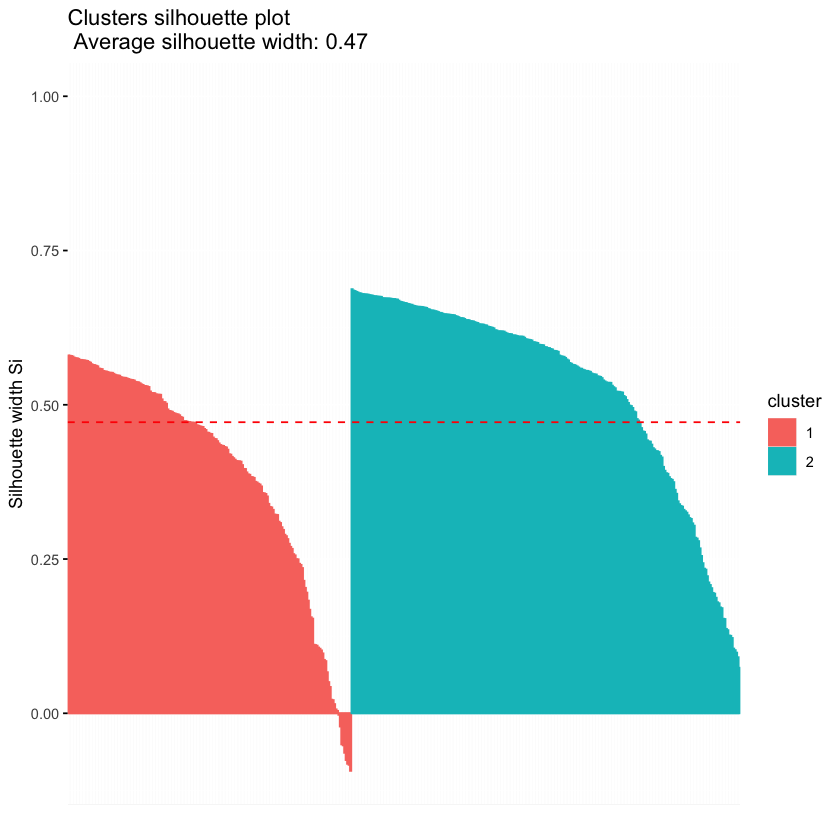

In [47]:
set.seed(123)
km <- kmeans(var$coord, centers = 3, nstart = 25)

grp <- as.factor(km$cluster)
# Color variables by groups
fviz_pca_var(pca, col.var = grp, 
             palette = c("#0073C2FF", "#EFC000FF", "#868686FF"),
             legend.title = "Cluster")

pcal <- prcomp(modded_data, center=FALSE, scale.=FALSE, rank. = 4)

results <- pcal$x

km1<-eclust(results, "kmeans", hc_metric="eucliden",k=2)


fviz_silhouette(km1)
km1$nbclust

km1


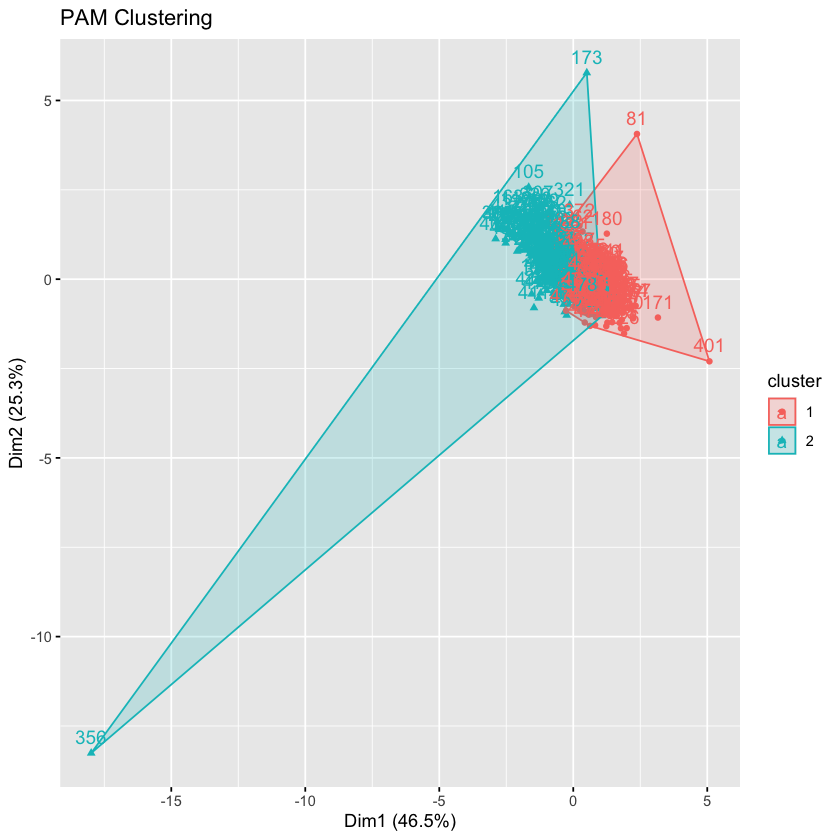

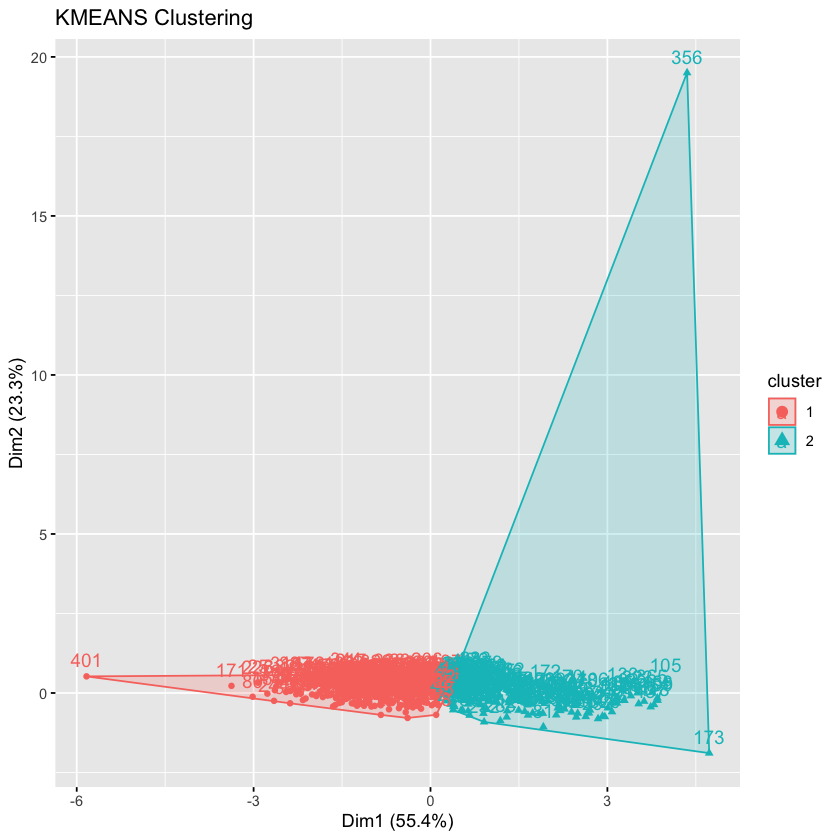

In [48]:
data_raw <- as.matrix(modded_data)

df.n<-data.Normalization(data_raw, type="n1", normalization="column")

pam1<-eclust(results, "pam", k=2)

km1<-eclust(df.n, "kmeans", hc_metric="eucliden", k=2)

# hopkins(